### Практикуемся в работе с VK API


1. Скачать список пользователей, состоящих в группе https://vk.com/dormitory8hse. Нарисовать столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.
2. В той же группе скачать 1000 записей со стены. Нарисовать график, показывающий, сколько записей было написано в каждый час. Вывести записи, набравшие наибольшее количество лайков и с наибольшим числом комментариев.
3. Скачать список пользователей, состоящих в группе https://vk.com/hse_university. Нарисовать столбчатую диаграмму, показывающую распределение пользователей по их году рождения. 
4. Найти, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Нарисовать диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
4. Собрать корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найти самые частотные биграммы в этом корпусе.

In [1]:
import urllib.request
import json

In [7]:
users = set()
offsets = [0, 1000, 2000, 3000, 4000]
token = '8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8'
version = '5.92'
group = 'dormitory8hse'

for off in offsets:
    req = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=%s&access_token=%s&v=%s&offset=%s' 
                                 % (group, token, version, off))
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    users = users | set(data['response']['items'])
len(users)

5000

In [9]:
cities = []
i = 0
for user in users:
    if i > 1000:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=home_town'
                                % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        continue
    cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

1001


In [10]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [72]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}

# сортируем словарь по значениям
sorted(cities.items(), key=lambda x: x[1], reverse=True)

[('Москва', 44),
 ('Ташкент', 16),
 ('Чебоксары', 14),
 ('Санкт-Петербург', 13),
 ('Воронеж', 12),
 ('Екатеринбург', 10),
 ('Ижевск', 9),
 ('Брянск', 9),
 ('Киров', 9),
 ('Пермь', 9),
 ('Набережные Челны', 9),
 ('Новосибирск', 9),
 ('Самара', 8),
 ('Уфа', 7),
 ('Красноярск', 7),
 ('Казань', 7),
 ('Тула', 7),
 ('Челябинск', 7),
 ('Тверь', 6),
 ('Нижний Новгород', 6),
 ('Ростов-на-Дону', 5),
 ('Тамбов', 5),
 ('Тольятти', 5),
 ('Одинцово', 5),
 ('Калуга', 5),
 ('Волжский', 5),
 ('Саратов', 5),
 ('Йошкар-Ола', 4),
 ('Вологда', 4),
 ('Белгород', 4),
 ('Кишинёв', 4),
 ('Владикавказ', 4),
 ('Рязань', 4),
 ('Ростов на Дону', 3),
 ('Ставрополь', 3),
 ('Курск', 3),
 ('Иваново', 3),
 ('Владимир', 3),
 ('Караганда', 3),
 ('Астрахань', 3),
 ('Липецк', 3),
 ('Иркутск', 3),
 ('Коломна', 3),
 ('Ярославль', 3),
 ('Глазов', 3),
 ('Киев', 3),
 ('Омск', 3),
 ('Находка', 3),
 ('Элиста', 3),
 ('Сыктывкар', 3),
 ('Краснодар', 3),
 ('Нижний Тагил', 3)]

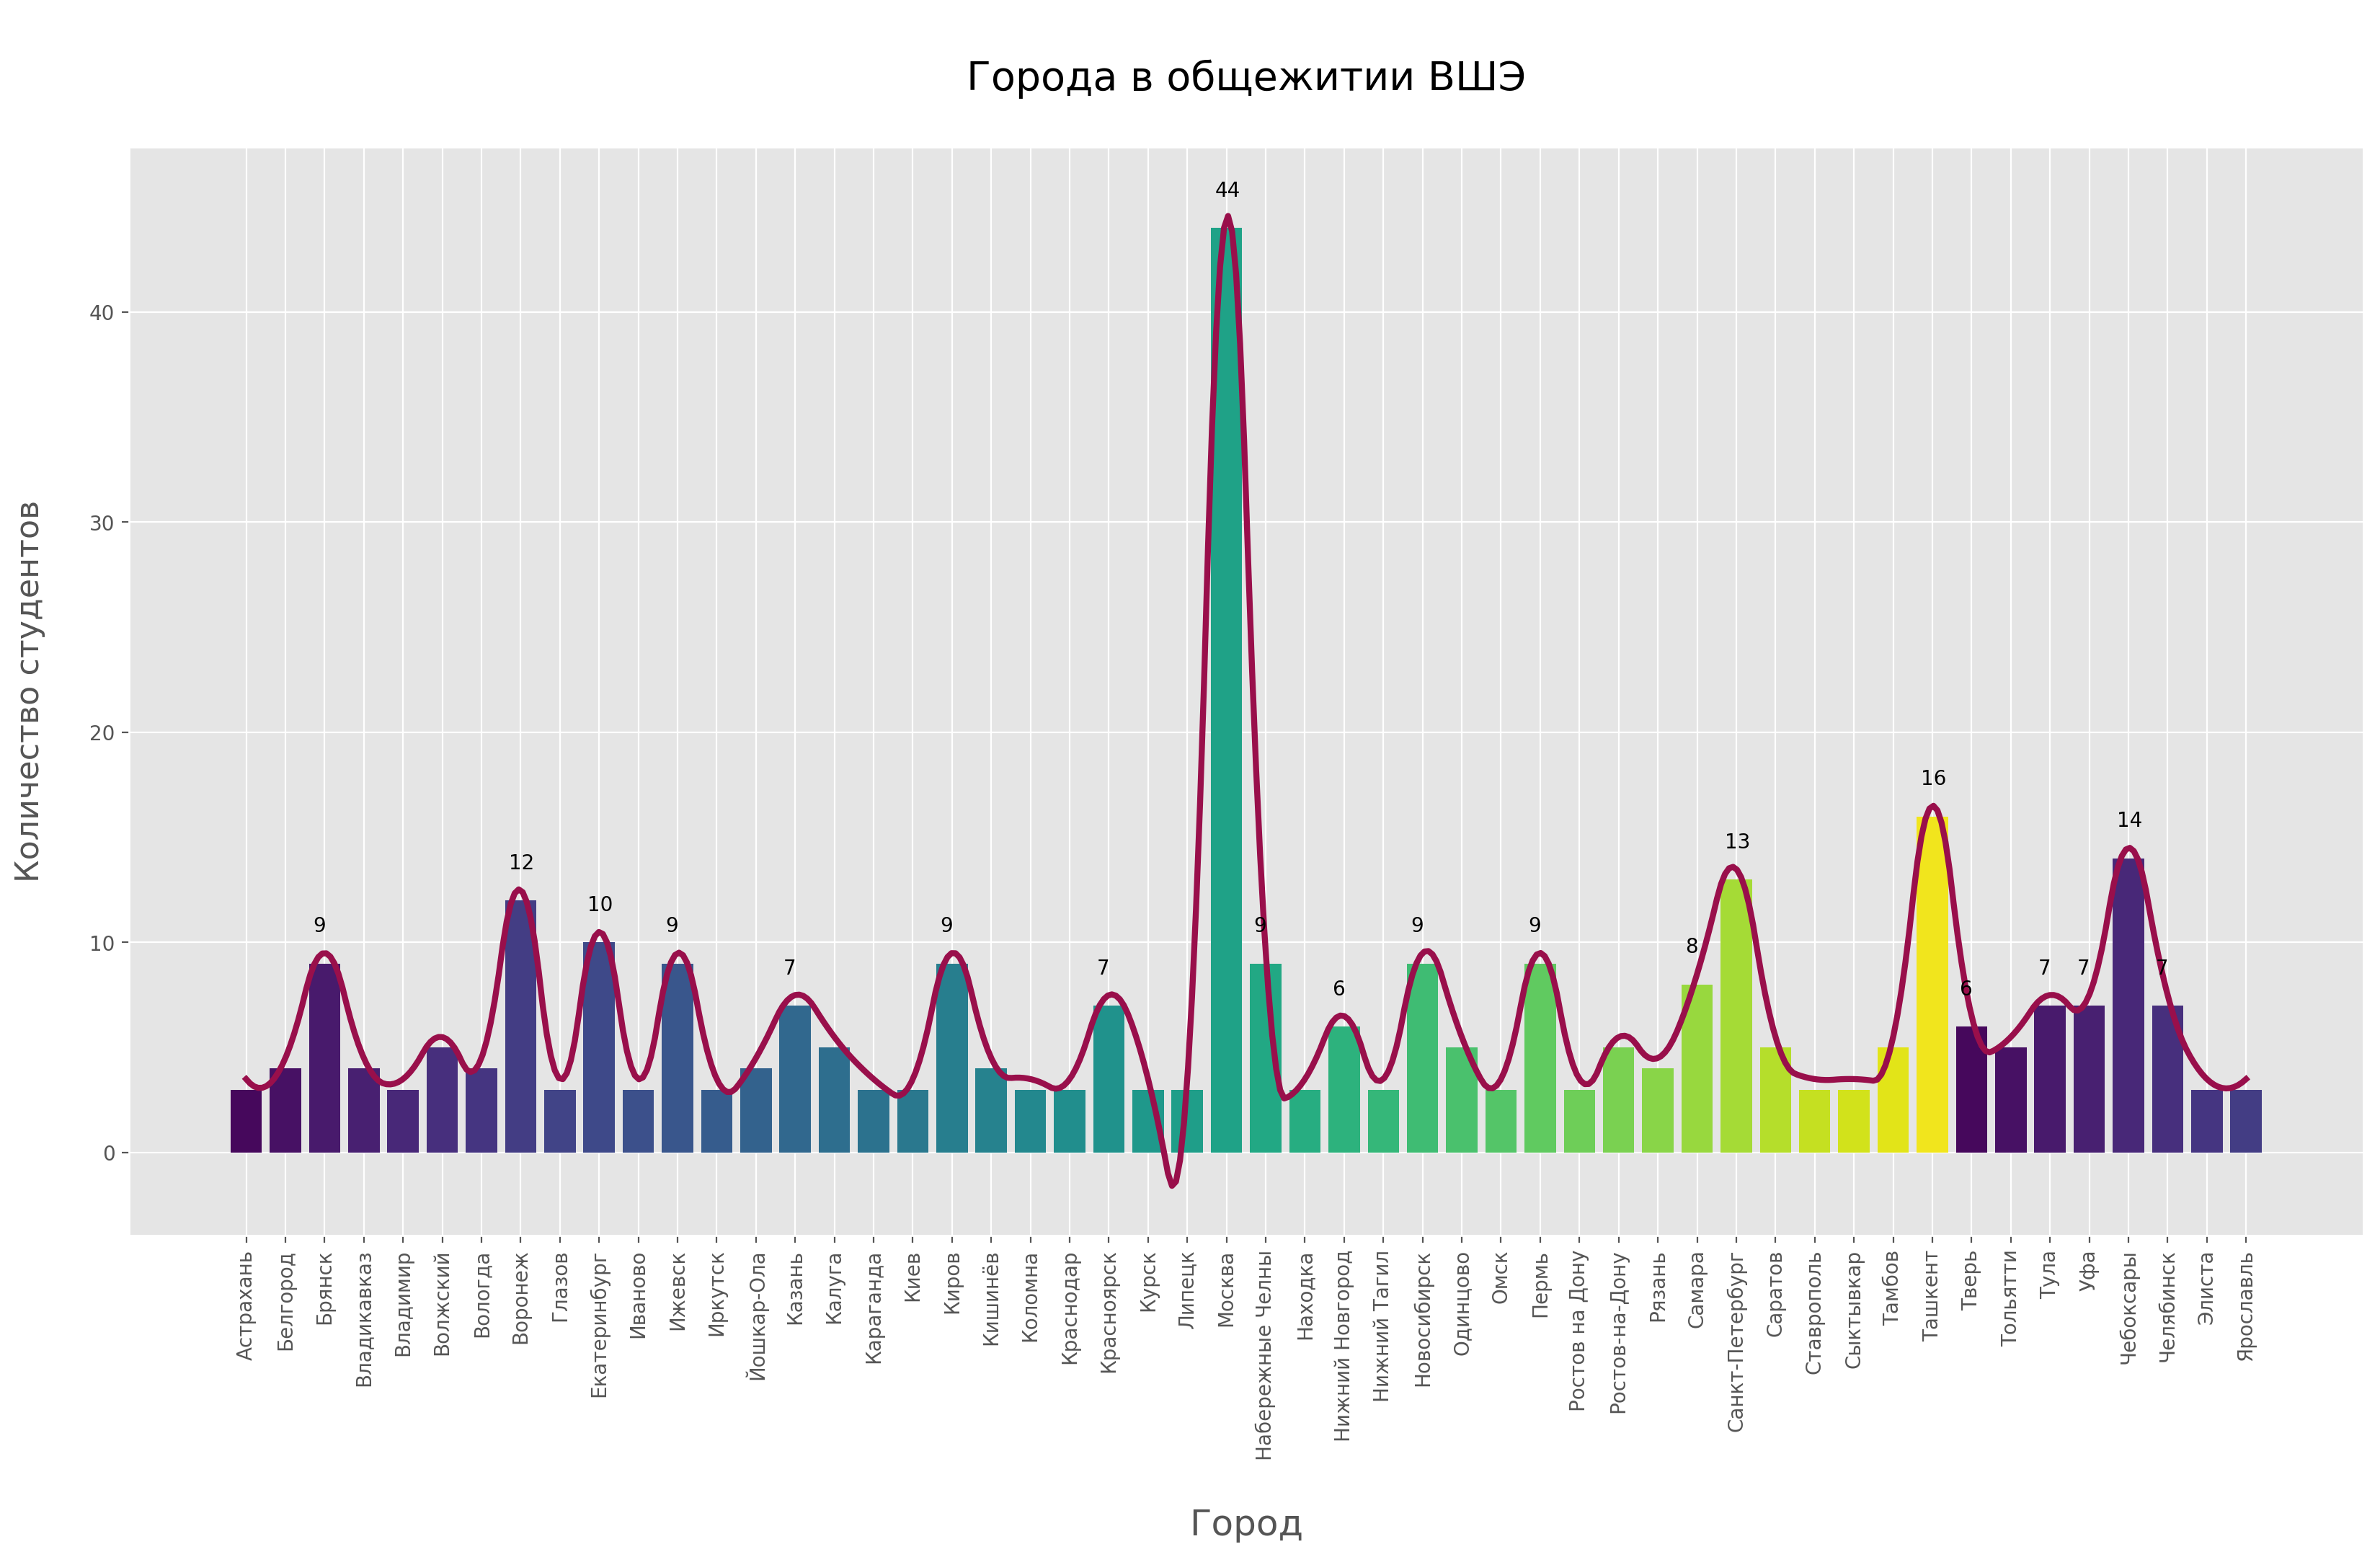

In [228]:
from scipy.interpolate import interp1d  # это чтобы нарисовать сглаженную кривую
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# отсортируем данные по названиям городов
city_nums = [c[1] for c in sorted(cities.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
city_labs = sorted([city for city in cities]) # подписи по оси x
x = range(len(city_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(city_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
f = interp1d(x, [x+0.5 for x in city_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)


plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, city_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
for a, b in zip(x, city_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nГорода в общежитии ВШЭ\n',  fontsize=20)
plt.ylabel('Количество студентов\n',  fontsize=16)
plt.xlabel('\nГород',  fontsize=18)
plt.xticks(x, city_labs, rotation=90)
plt.show()

Вот [отсюда](https://matplotlib.org/examples/color/colormaps_reference.html) можно взять цветовые схемы (color maps), а [отсюда](https://www.w3schools.com/colors/colors_xkcd.asp) — небанальные цвета.

А как сделать так, чтобы цвета соответствовали занчению по Y, да еще и в рамках выбранной цветовой схемы?

In [177]:
import matplotlib
import matplotlib.cm as cm

# переведем абсолютные значения в проценты (просто так :)
total = sum(city_nums)
city_percent = [num/total*100 for num in city_nums]

norm = matplotlib.colors.Normalize(vmin=min(x), vmax=max(x)//10, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='PuBuGn')

colors = [mapper.to_rgba(v) for v in city_percent]

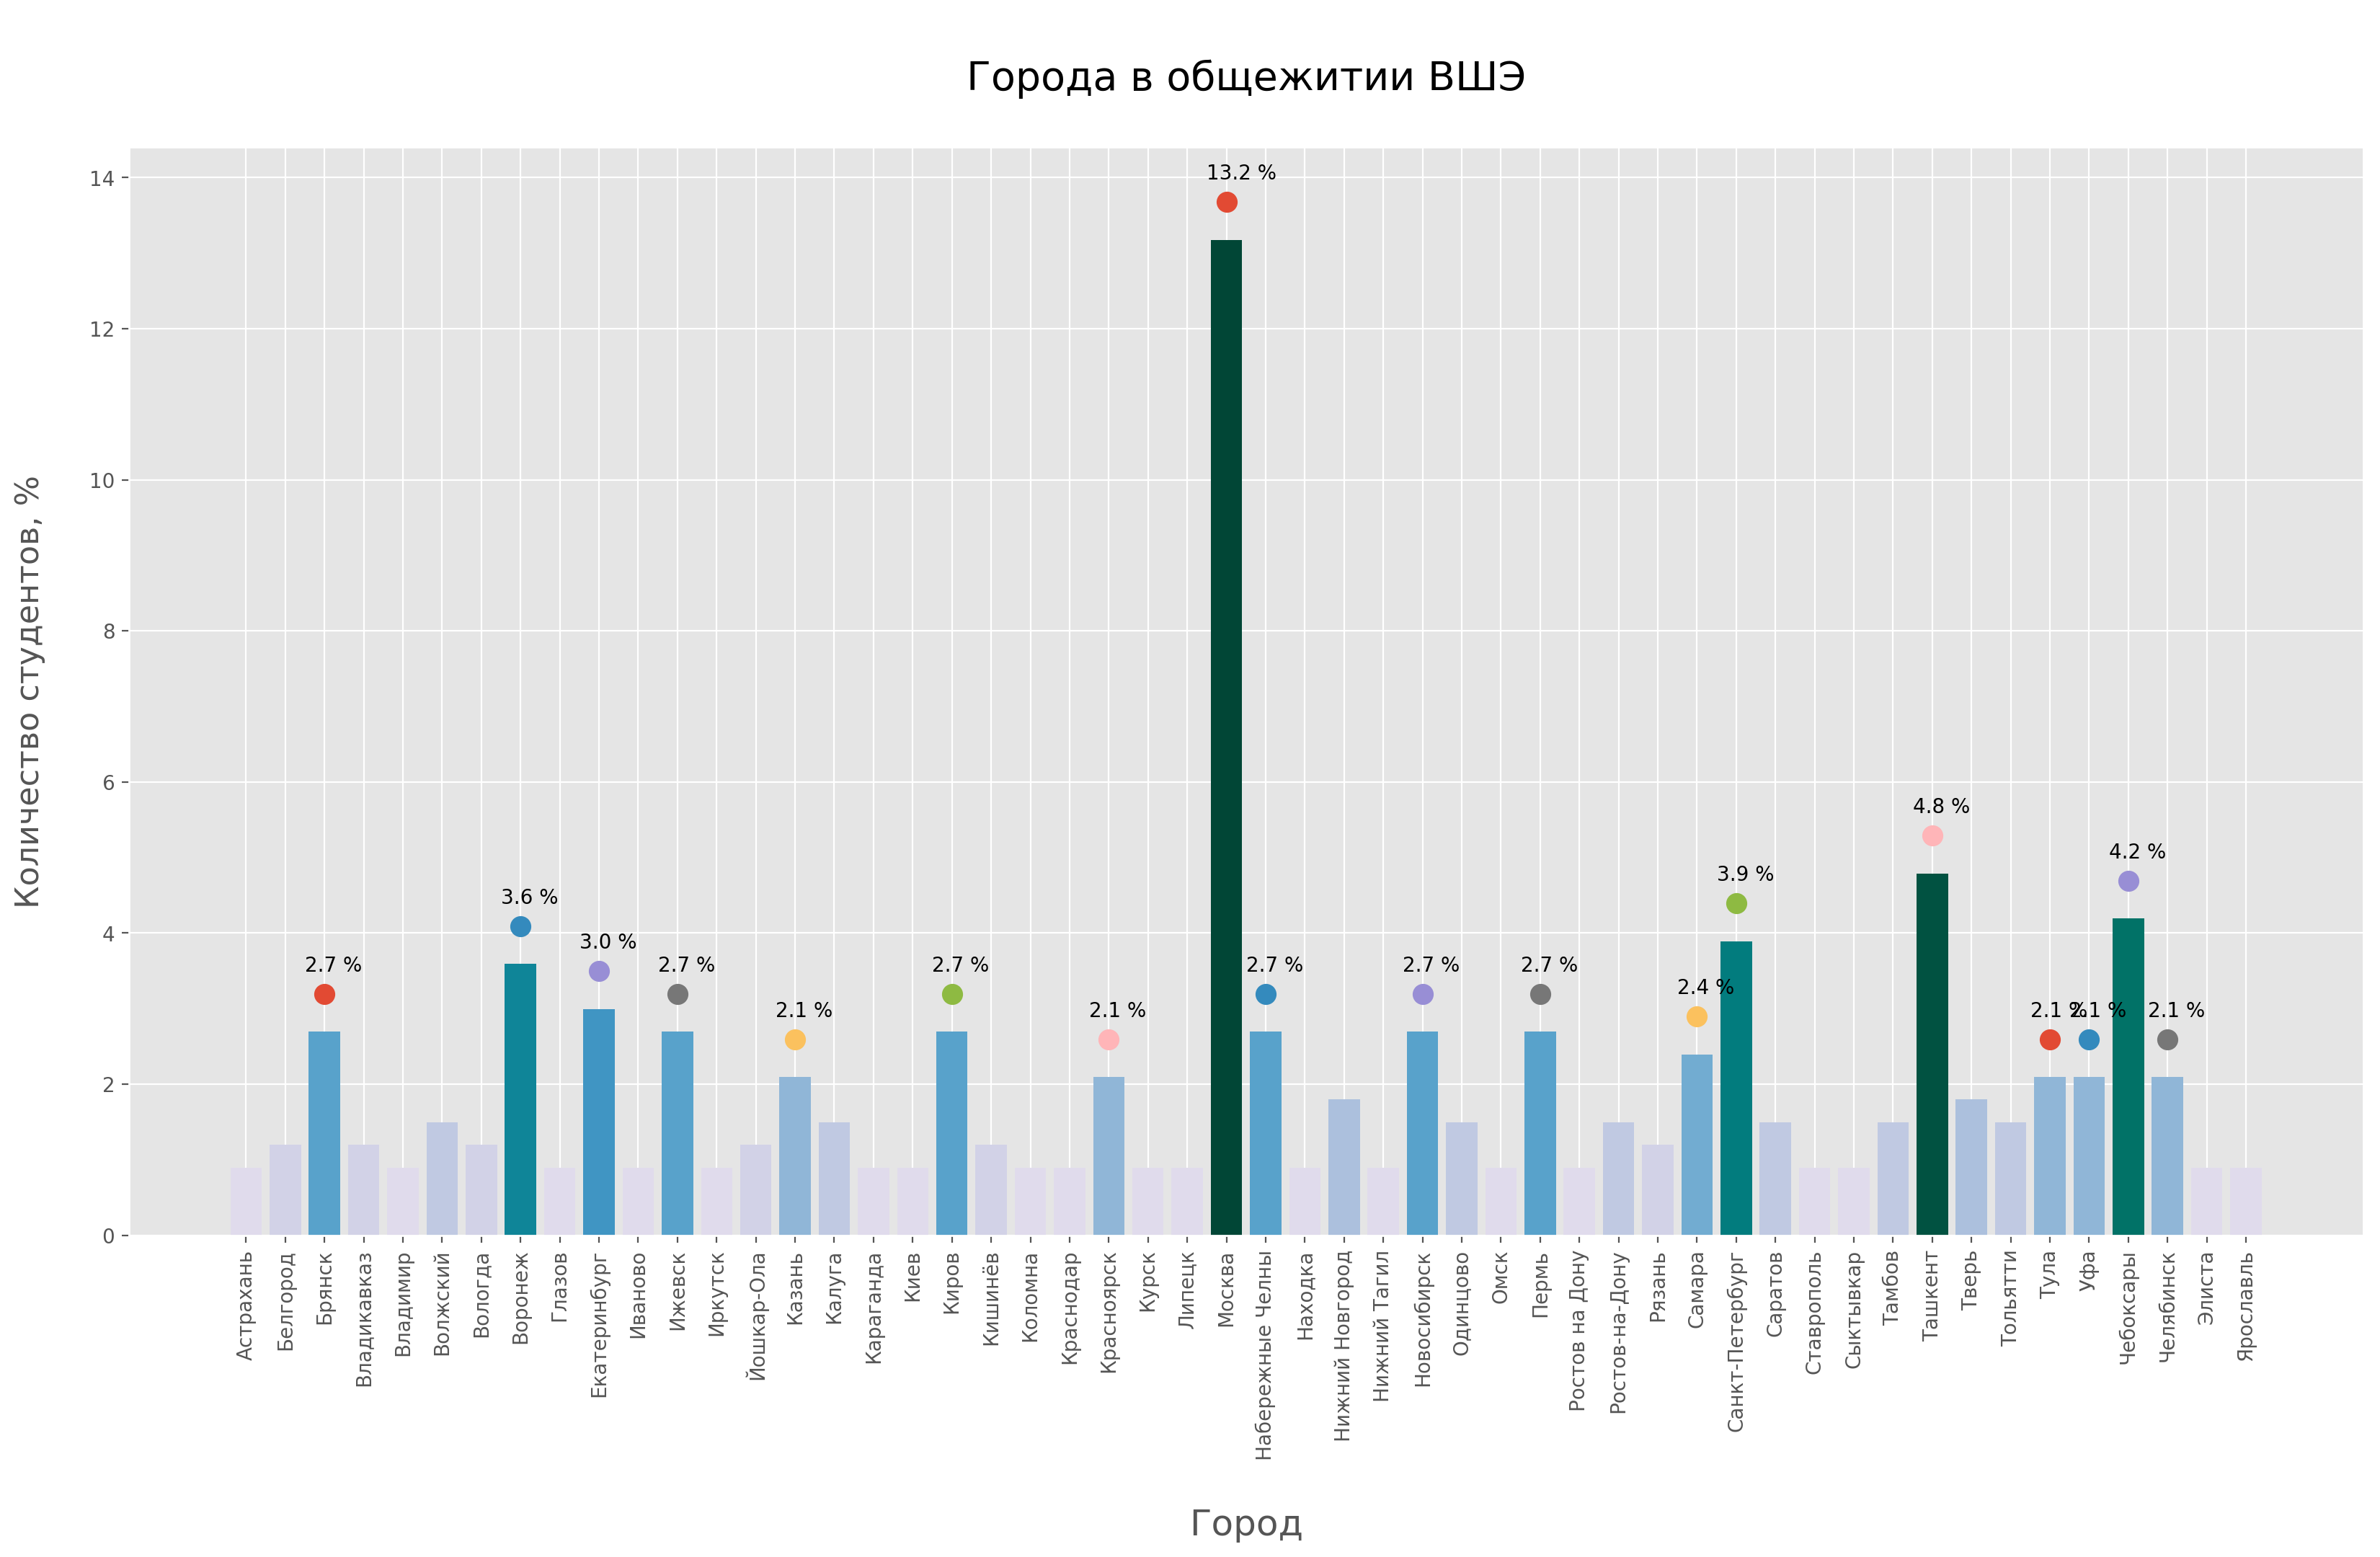

In [200]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, city_percent, color=colors)

# рисуем точки максимумов (условных)
for a, b in zip(x, city_percent):
    if b > 2:
        plt.scatter(a, b+0.5, s=100)
        plt.text(a-0.5, b+0.8, '%.1f %%' % (b))


plt.title('\nГорода в общежитии ВШЭ\n',  fontsize=20)
plt.ylabel('Количество студентов, %\n',  fontsize=16)
plt.xlabel('\nГород',  fontsize=18)
plt.xticks(x, city_labs, rotation=90)
plt.show()

# Бонус: интерактивные графики

Раньше для создания красивых интерактивных графиков необходимо было знать JavaScript или хотя бы его библиотеку d3. Но теперь есть `plotly`, с помощью которого можно создавать графики на питоне без ~~регистрации и смс~~ всякого JavaScript'a. Устанавливается стандартно, `pip install plotly`. Увы, пока ни GitHub, ни Google Colab не умеет рендерить эти визуализации, поэтому увидеть их можно либо у себя в ipython-тетрадке, либо выложив на сайт. К последнему — интерактивным графикам в вебе — мы еще обязательно вернемся, а пока поработаем с plotly оффлайн.

Документация с примерами:

* [Barplots](https://plot.ly/python/bar-charts/)
* [Scateplots](https://plot.ly/python/line-and-scatter/)
* [Line Charts](https://plot.ly/python/line-charts/)
* [Список базовых графиков](https://plot.ly/python/basic-charts/)
* [Вся документация по работе с plotly для питона](https://plot.ly/python/)

In [224]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

# инциализация 
init_notebook_mode(connected=True)

pl_colors = ['rgba'+str(col) for col in colors] # plotly хочет rgba-цвета в немного другом формате

# данные для графика
data = [go.Bar(
            x = city_labs,
            y = city_nums,
            text = ['%.1f %%' % (num) for num in city_percent],  # текст при наведении (например, проценты)
            marker = dict(color=pl_colors)
    )]

# описание 
layout = go.Layout(
    title = 'Города в общежитии ВШЭ',
    xaxis=dict(tickangle = -45),
    yaxis = dict(title='Количество студентов')
)

# добавляем данные и описание на график
fig = go.Figure(data=data, layout=layout)

# рисуем график
iplot(fig)